In [2]:
import torch
import torchvision.transforms as T
from PIL import Image
import requests
from io import BytesIO



# Load an example image
#url = "https://github.com/andreminin/Building-Transformer-Models-with-PyTorch-2.0/blob/f16fe05210fd07cae89912820efb712fae3e78b9/chapter7_ComputerVisionArch/tulip_field.png"
#response = requests.get(url)
#img = Image.open(BytesIO(response.content))
img = Image.open("tulip_field.png")
# convert to RGB
img = img.convert("RGB")




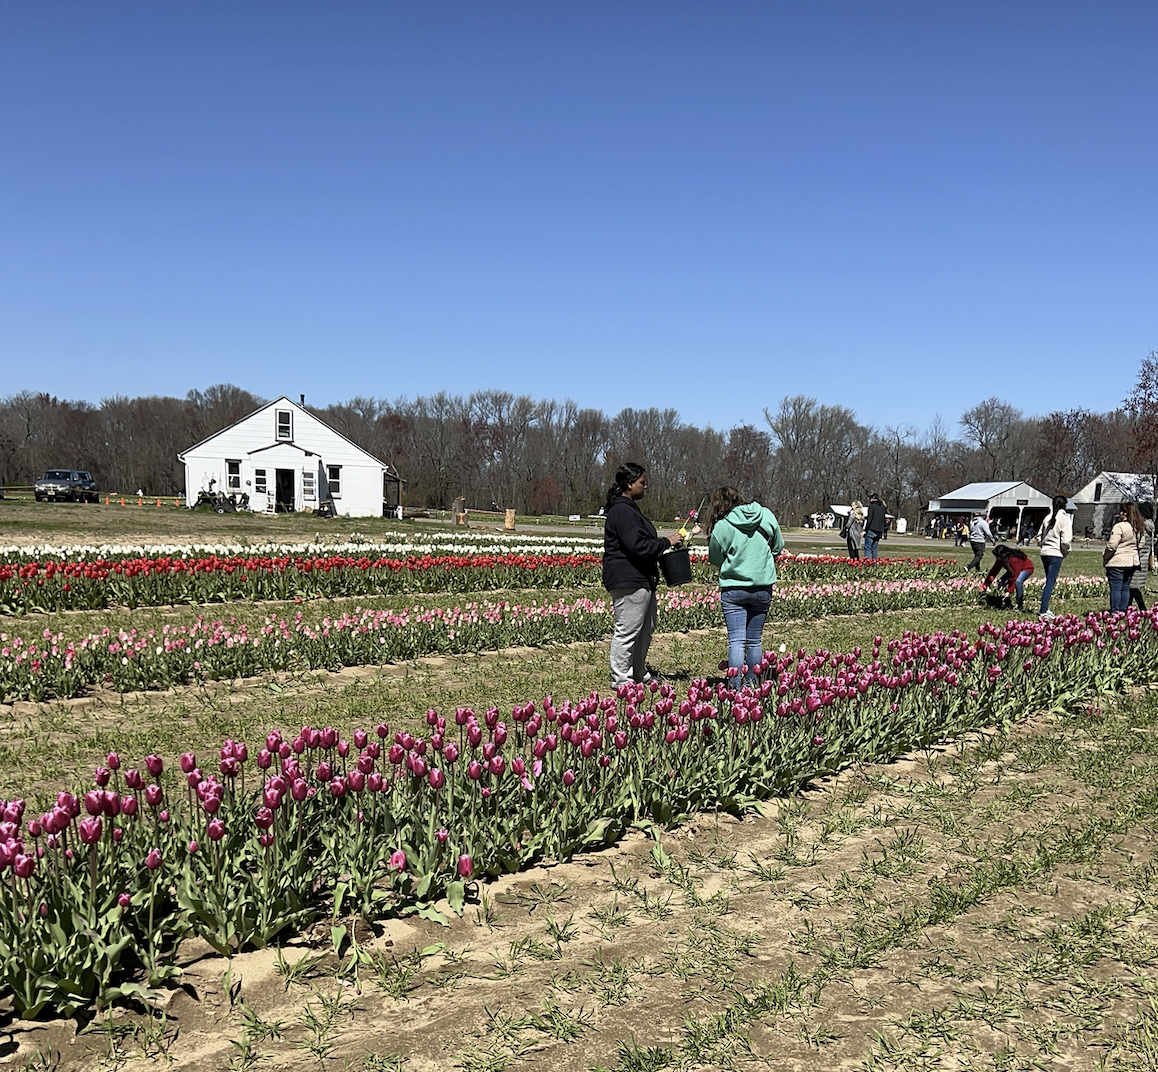

In [3]:
from IPython.display import display

display(img)

In [4]:
# Define the data augmentation pipeline
transforms = T.Compose([
    T.RandomRotation(degrees=(-15, 15), fill=0),
    T.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomVerticalFlip(p=0.5),
    T.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Apply the data augmentation pipeline to the image
augmented_img = transforms(img)

# To visualize the augmented image, you can convert it back to a PIL image
# Don't forget to undo the normalization before converting it
unnormalized_img = T.Compose([
    T.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225], std=[1/0.229, 1/0.224, 1/0.225]),
    T.ToPILImage(),
])(augmented_img)



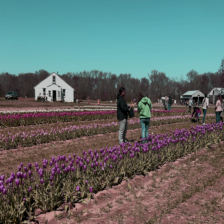

In [5]:
from IPython.display import display

display(unnormalized_img)